In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

# Undirected graph

The simplest type of graph to consider is undirected graph. It consists of nodes connected by edges

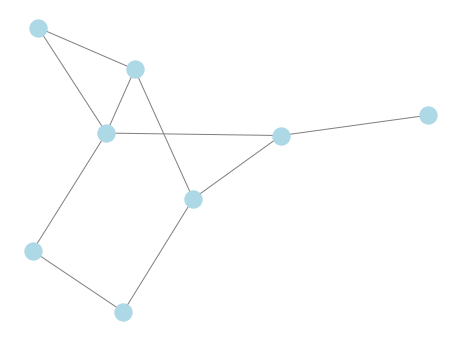

In [2]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'D')
G.add_edge('C', 'E')
G.add_edge('D', 'F')
G.add_edge('D', 'G')
G.add_edge('F', 'G')
G.add_edge('B', 'G')
G.add_edge('E', 'H')
G.add_edge('G', 'H')

pos = nx.layout.spring_layout(G)
plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(G, pos, node_color='lightblue')
edges = nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.axis('off');

# Directed graph

In directed graph, each node is associated with a direction

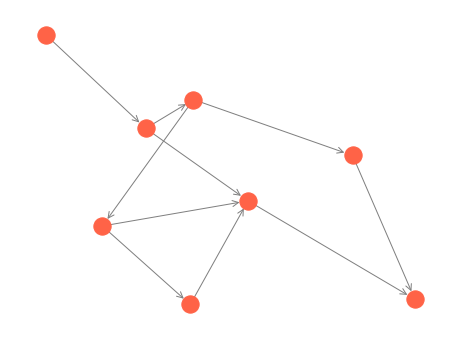

In [3]:
DG = nx.DiGraph()
DG.add_edge('A', 'B')
DG.add_edge('B', 'C')
DG.add_edge('C', 'D')
DG.add_edge('C', 'E')
DG.add_edge('D', 'F')
DG.add_edge('D', 'G')
DG.add_edge('F', 'G')
DG.add_edge('B', 'G')
DG.add_edge('E', 'H')
DG.add_edge('G', 'H')

pos = nx.layout.spring_layout(DG)
plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(DG, pos, node_color='tomato')
edges = nx.draw_networkx_edges(DG, pos, edge_color='grey', arrowstyle='->', arrowsize=15)
plt.axis('off');

# Weighted networks
Each edge can have different weight, idicating strength of a connection between pair of nodes

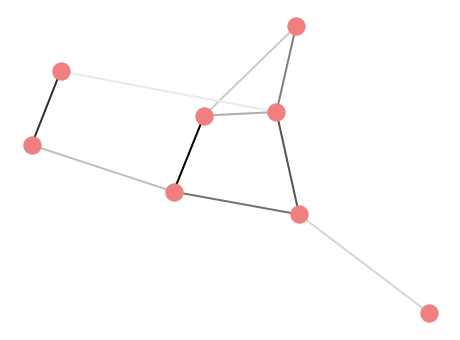

In [4]:
WG = nx.Graph()
WG.add_edge('A', 'B', weight=6)
WG.add_edge('B', 'C', weight=13)
WG.add_edge('C', 'D', weight=20)
WG.add_edge('C', 'E', weight=8)
WG.add_edge('D', 'F', weight=7)
WG.add_edge('D', 'G', weight=9)
WG.add_edge('F', 'G', weight=12)
WG.add_edge('B', 'G', weight=15)
WG.add_edge('E', 'H', weight=17)
WG.add_edge('G', 'H', weight=4)

pos = nx.layout.spring_layout(WG)
plt.figure(figsize=(8, 6))

edge_colors = [v for k, v in nx.get_edge_attributes(WG,'weight').items()]
nodes = nx.draw_networkx_nodes(WG, pos, node_color='lightcoral')
edges = nx.draw_networkx_edges(WG, pos, edge_vmin=1, edge_vmax=20, edge_cmap=plt.cm.Greys, edge_color=edge_colors, width=2)
plt.axis('off');

# Signed networks 

Apart from giving a weight for a certain edge, we can also mark the edge positive or negative sign

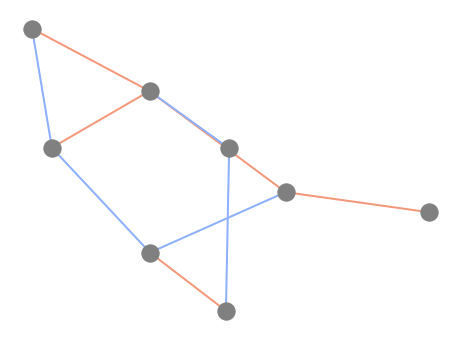

In [5]:
SG = nx.Graph()
SG.add_edge('A', 'B', sign='+')
SG.add_edge('B', 'C', sign='-')
SG.add_edge('C', 'D', sign='-')
SG.add_edge('C', 'E', sign='+')
SG.add_edge('D', 'F', sign='-')
SG.add_edge('D', 'G', sign='+')
SG.add_edge('F', 'G', sign='+')
SG.add_edge('B', 'G', sign='+')
SG.add_edge('E', 'H', sign='-')
SG.add_edge('G', 'H', sign='-')

pos = nx.layout.spring_layout(SG)
plt.figure(figsize=(8, 6))

edge_colors = [50 if v=='+' else -50 for k, v in nx.get_edge_attributes(SG,'sign').items()]
nodes = nx.draw_networkx_nodes(WG, pos, node_color='grey')
edges = nx.draw_networkx_edges(WG, pos, edge_vmin=-100, edge_vmax=100,
                               edge_cmap=plt.cm.coolwarm, edge_color=edge_colors, width=2)
plt.axis('off');

# Edge attributes
We can also use other edge attributes, such as type of relation

In [6]:
G = nx.Graph()
G.add_edge('A', 'B', relation='friend')
G.add_edge('B', 'C', relation='family')
G.add_edge('C', 'D', relation='parent')
G.add_edge('C', 'E', relation='neigbour')
G.add_edge('D', 'F', relation='sibling')
G.add_edge('D', 'G', relation='friend')
G.add_edge('F', 'G', relation='child')
G.add_edge('B', 'G', relation='boss')
G.add_edge('E', 'H', relation='friend')
G.add_edge('G', 'H', relation='coworker')

In [7]:
G.edges['A', 'B']['relation']

'friend'

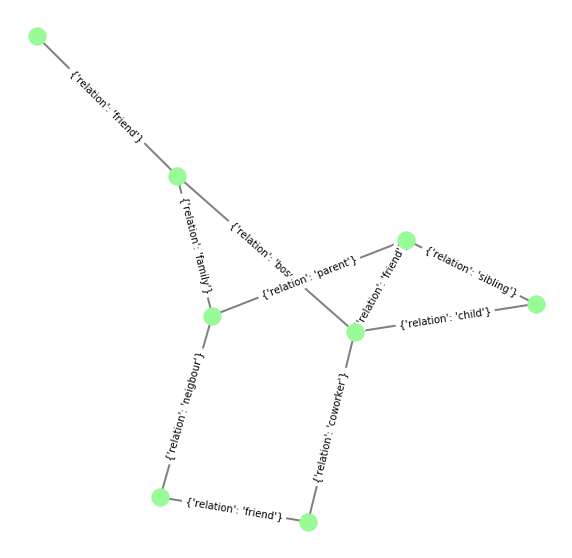

In [8]:
pos = nx.layout.spring_layout(G)
plt.figure(figsize=(10, 10))

nodes = nx.draw_networkx_nodes(G, pos, node_color='palegreen')
labels = nx.get_edge_attributes(G, 'relation')
edges = nx.draw_networkx_edges(G, pos, width=2, labels=labels, edge_color='grey')
edge_labels = nx.draw_networkx_edge_labels(G, pos=pos)
plt.axis('off');

# Multigraphs

In multigraphs, two nodes can have multiple connections

In [9]:
MG = nx.MultiGraph()
MG.add_edge('A', 'B', relation='friend')
MG.add_edge('A', 'B', relation='family')

1

In [10]:
MG.edges(data=True)

MultiEdgeDataView([('A', 'B', {'relation': 'friend'}), ('A', 'B', {'relation': 'family'})])

In [11]:
MG.edges(data='relation')

MultiEdgeDataView([('A', 'B', 'friend'), ('A', 'B', 'family')])

In [12]:
MG.edges['A', 'B', 0]

{'relation': 'friend'}

In [13]:
MG.edges['A', 'B', 1]

{'relation': 'family'}

One can also mix graph dtypes, for example there can be multiple directed graph

In [14]:
MG = nx.MultiDiGraph()
MG.add_edge('A', 'B', relation='friend')
MG.add_edge('A', 'B', relation='family')

1

# Node attributes
We can also assign attributes to the nodes

In [15]:
G = nx.Graph()
G.add_edge('A', 'B', weight='6', relation='friend')
G.add_edge('A', 'B', weight='5', relation='neighbour')

In [16]:
G.add_node('A', role='trader')
G.add_node('B', role='manager')

In [17]:
G.nodes()

NodeView(('A', 'B'))

In [18]:
G.nodes(data=True)

NodeDataView({'A': {'role': 'trader'}, 'B': {'role': 'manager'}})

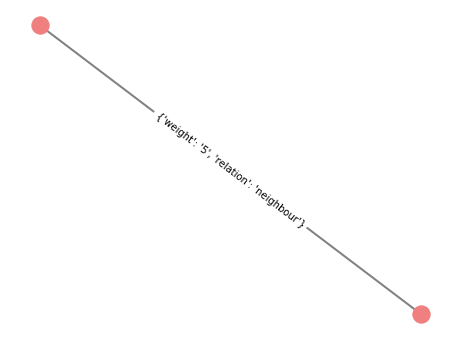

In [19]:
pos = nx.layout.spring_layout(G)
plt.figure(figsize=(8, 6))

nodes = nx.draw_networkx_nodes(G, pos, node_color='lightcoral', label='role')
edges = nx.draw_networkx_edges(G, pos, width=2, label='relation', edge_color='grey')
edge_labels = nx.draw_networkx_edge_labels(G, pos=pos)
plt.axis('off');

# Bipartite graphs
Biparite graph is a graph with two set of nodes, such that nodes from the first set of nodes are connected to the nodes from the other set, and there is no connections within nodes

In [20]:
B = nx.Graph()
B.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite=0)
B.add_nodes_from([1, 2, 3, 4], bipartite=1)
B.add_edges_from([('A', 1), ('B', 1), ('B', 2), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

We can see the two sets

In [21]:
bipartite.sets(B)

({'A', 'B', 'C', 'D', 'E'}, {1, 2, 3, 4})

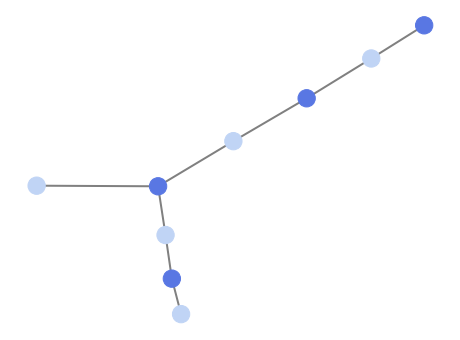

In [22]:
plt.figure(figsize=(8, 6))

pos = nx.layout.spring_layout(B)
node_colors = [0.1 if v['bipartite']==1 else 0.4 for k, v in B.nodes().items()]
nodes = nx.draw_networkx_nodes(B, pos, node_color=node_colors, cmap=plt.cm.coolwarm, vmin=0.0 ,vmax=1.0)
edges = nx.draw_networkx_edges(B, pos, width=2, edge_color='grey')
plt.axis('off');

In [23]:
bipartite.is_bipartite(B)

True

After adding a connection between nodes from the first set, our graph is no longer biparite

In [24]:
B.add_edge('A', 'B')
bipartite.is_bipartite(B)

False

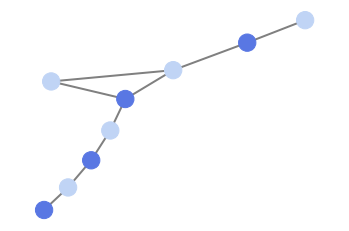

In [25]:
pos = nx.layout.spring_layout(B)
node_colors = [0.1 if v['bipartite']==1 else 0.4 for k, v in B.nodes().items()]
nodes = nx.draw_networkx_nodes(B, pos, node_color=node_colors, cmap=plt.cm.coolwarm, vmin=0.0 ,vmax=1.0)
edges = nx.draw_networkx_edges(B, pos, width=2, edge_color='grey')
plt.axis('off');

Removing this connection fixes the graph - it's biparite again

In [26]:
B.remove_edge('A', 'B')

In [27]:
X = set([1, 2, 3, 4])
bipartite.is_bipartite_node_set(B, X)

True

In [28]:
X = set(['A', 'B', 'C', 'D', 'E'])
bipartite.is_bipartite_node_set(B, X)

True

# Projected graphs
Based on biparite graph with two sets of nodes - L and R, we can define projected graphs - graphs of connections within the two sets. Two nodes from the set L are connected, if both of them have a common neighbour in set R. It's called L-Biparate graph projection. There is similar definition for R-Biparate graph projection.

In [29]:
B = nx.Graph()
B.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('D', 1), ('H', 1), ('B', 2),
                  ('C', 2), ('D', 2),('E', 2), ('G', 2), ('E', 3), ('F', 3), 
                  ('H', 3), ('J', 3), ('E', 4), ('I', 4), ('J', 4)])

X = set(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

P = bipartite.projected_graph(B, X)

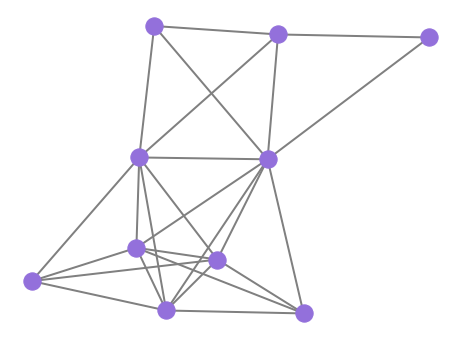

In [30]:
plt.figure(figsize=(8, 6))

pos = nx.layout.spring_layout(P)
nodes = nx.draw_networkx_nodes(P, pos, node_color='mediumpurple')
edges = nx.draw_networkx_edges(P, pos, width=2, edge_color='grey')
plt.axis('off');

We can also construct L-Biparate weighted graph projection, in which a weight is defined by number of common neighbours in graph R

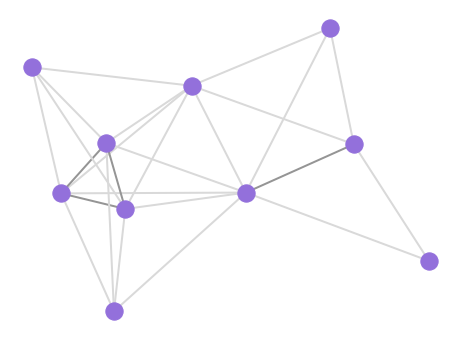

In [31]:
WP = bipartite.weighted_projected_graph(B, X)
pos = nx.layout.spring_layout(WP)
plt.figure(figsize=(8, 6))

edge_colors = [v for k, v in nx.get_edge_attributes(WP,'weight').items()]
nodes = nx.draw_networkx_nodes(WP, pos, node_color='mediumpurple')
edges = nx.draw_networkx_edges(WP, pos, edge_vmin=0, edge_vmax=4, edge_cmap=plt.cm.Greys, edge_color=edge_colors, width=2)
plt.axis('off');